# Análisis de datos de autos

En este proyecto se plantea la hipótesis de que las características técnicas y de uso de los automóviles, tales como la potencia, la eficiencia de combustible, las emisiones de CO2 y el tipo de tracción, influyen significativamente en su precio, popularidad y demanda en el mercado. Se parte de la premisa de que los autos con mayor eficiencia y menor impacto ambiental presentan una mayor aceptación en mercados actuales, mientras que la potencia y el tipo de tracción pueden estar asociados a segmentos específicos de usuarios.

Para validar estas hipótesis, se utiliza un dataset compuesto por variables como 'Brand', 'Model', 'Year', 'Country', 'Condition', 'Engine_Size', 'Horsepower', 'Torque', 'Weight', 'Top_Speed', 'Acceleration_0_100', 'Fuel_Type', 'Drivetrain', 'Transmission', 'Fuel_Efficiency', 'CO2_Emissions', 'Price', 'Mileage', 'Popularity', 'Safety_Rating', 'Number_of_Owners', 'Market_Demand', 'Insurance_Cost', 'Production_Units', 'Log_Price', 'Log_Mileage', 'decada' y 'Grupo_Potencia'. El objetivo principal es analizar la relación entre estas variables y extraer patrones que permitan comprender mejor el comportamiento del mercado automotriz, así como identificar oportunidades de optimización en la oferta de vehículos.

Durante el análisis exploratorio, se identificaron valores perdidos en varias columnas del dataset, lo que requirió la aplicación de técnicas de limpieza y tratamiento de datos para asegurar la calidad y robustez de los resultados obtenidos.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn


In [3]:
df=pd.read_csv('../data/datasetautostop.csv')
display(df.head())

,Brand,Model,Year,Country,Condition,Engine_Size,Horsepower,Torque,Weight,Top_Speed,...,Mileage,Popularity,Safety_Rating,Number_of_Owners,Market_Demand,Insurance_Cost,Production_Units,Log_Price,Log_Mileage,Modification
0,Nissan,720S,2006,Asia,used,3.7,420,705,1785,238,...,96664,Low,2,4,Medium,13410,5000,11.309352,11.479007,V-Spec
1,McLaren,911 Turbo S,2009,Europe,new,5.3,1104,766,992,386,...,159630,High,2,2,Medium,10795,1000,12.639334,11.980620,NaN
2,Chevrolet,M4 Competition,2009,USA,new,5.5,153,1573,2022,397,...,111496,High,1,2,Low,1716,20000,12.948902,11.621753,NaN
3,Bugatti,Chiron,1982,Asia,used,5.4,544,1009,1091,151,...,217228,High,2,4,Medium,11618,20000,11.725542,12.288707,NaN
4,Nissan,Chiron,2022,Europe,new,2.4,980,693,1232,385,...,150318,Low,3,2,Medium,11324,100000,11.229289,11.920515,NaN


In [4]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [5]:
def agrupar_por_decada(df):
    """
    Agrega una columna 'decada' al DataFrame agrupando los años en décadas.
    """
    # Asegurarse de que 'Year' es tipo datetime
    if not np.issubdtype(df['Year'].dtype, np.datetime64):
        df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    # Extraer el año como entero
    years = df['Year'].dt.year
    # Calcular la década
    df['decada'] = (years // 10) * 10
    df['decada'] = df['decada'].astype(str) + "s"
    return df

# Aplicar la función al DataFrame
df = agrupar_por_decada(df)
display(df[['Year', 'decada']].head())

,Year,decada
0,2006-01-01,2000s
1,2009-01-01,2000s
2,2009-01-01,2000s
3,1982-01-01,1980s
4,2022-01-01,2020s


In [6]:
# Informe de calidad de datos del DataFrame
def informe_calidad_datos(df):
    print('--- INFORME DE CALIDAD DE DATOS ---')
    print('\nDimensiones del DataFrame:')
    print(f'Filas: {df.shape[0]}, Columnas: {df.shape[1]}')
    print('\nTipos de variables:')
    print(df.dtypes)
    print('\nValores nulos por columna:')
    print(df.isnull().sum())
    print('\nPorcentaje de valores nulos por columna:')
    print((df.isnull().mean()*100).round(2))
    print('\nCantidad de filas duplicadas:')
    print(df.duplicated().sum())
    print('\nEstadísticas descriptivas (numéricas):')
    print(df.describe().T)
    print('\nEstadísticas descriptivas (categóricas):')
    print(df.describe(include=['object', 'category']).T)
    print('\nValores únicos por columna:')
    print(df.nunique())
    print('\n--- FIN DEL INFORME ---')

# Ejecutar el informe de calidad de datos
informe_calidad_datos(df)

--- INFORME DE CALIDAD DE DATOS ---

Dimensiones del DataFrame:
Filas: 5000, Columnas: 28

Tipos de variables:
Brand                         object
Model                         object
Year                  datetime64[ns]
Country                       object
Condition                     object
Engine_Size                  float64
Horsepower                     int64
Torque                         int64
Weight                         int64
Top_Speed                      int64
Acceleration_0_100           float64
Fuel_Type                     object
Drivetrain                    object
Transmission                  object
Fuel_Efficiency              float64
CO2_Emissions                  int64
Price                          int64
Mileage                        int64
Popularity                    object
Safety_Rating                  int64
Number_of_Owners               int64
Market_Demand                 object
Insurance_Cost                 int64
Production_Units               int64
L

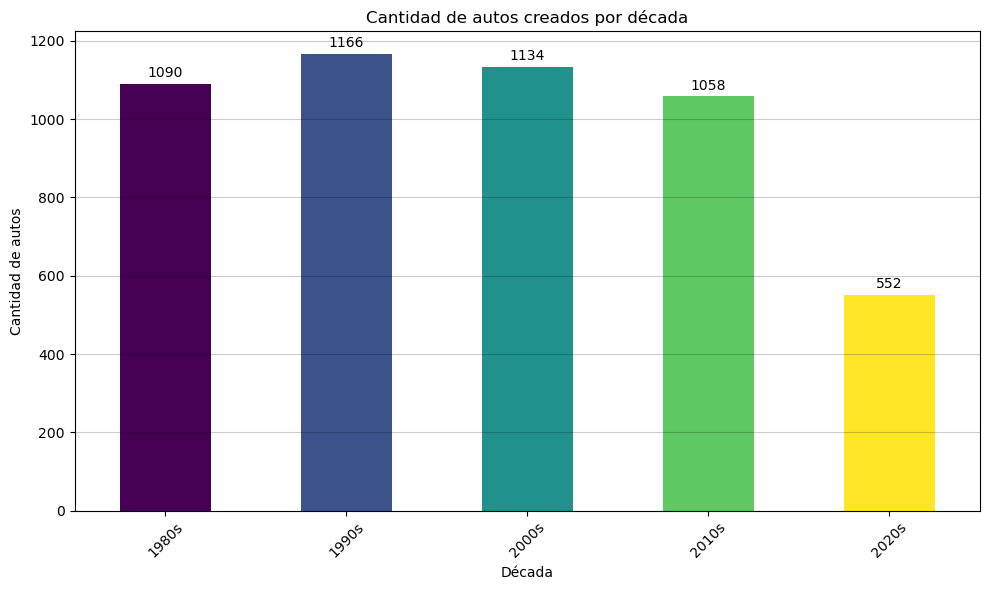

In [17]:
# Gráfico de barras: cantidad de autos por década usando solo las columnas permitidas
conteo_decadas = df['decada'].value_counts().sort_index()
plt.figure(figsize=(10,6))
colores = plt.cm.viridis(np.linspace(0,1,len(conteo_decadas)))
bars = conteo_decadas.plot(kind='bar', color=colores)
plt.xlabel('Década')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos creados por década')
plt.xticks(rotation=45)
plt.grid(axis='y', color='black', alpha=0.2)

# Agregar los valores encima de cada barra
for i, valor in enumerate(conteo_decadas.values):
    plt.text(i, valor + 10, str(valor), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

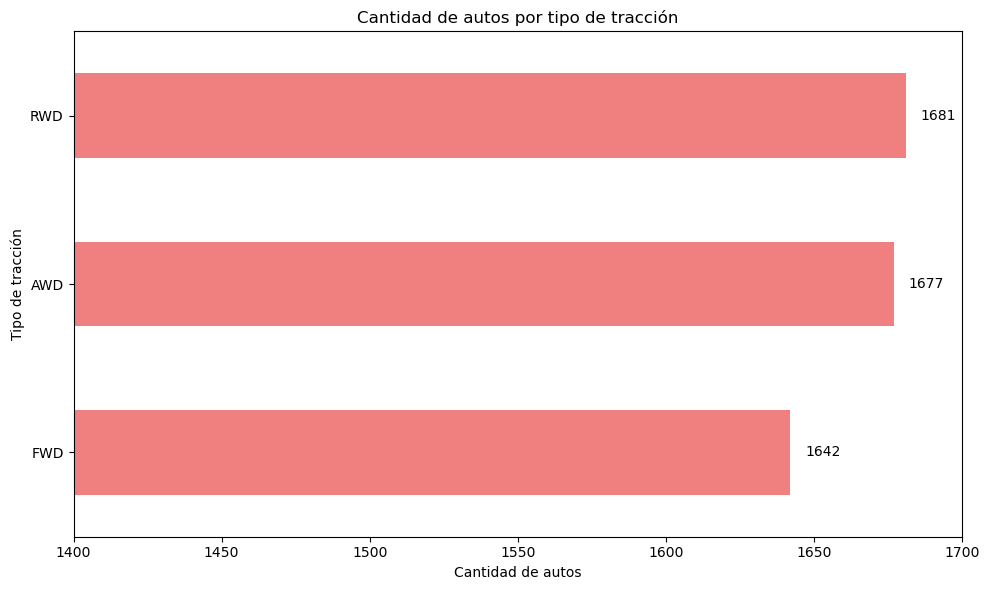

In [18]:
# Gráfico de barras horizontales: cantidad de autos por tipo de tracción
conteo_traccion = df['Drivetrain'].value_counts().sort_values()
plt.figure(figsize=(10,6))
conteo_traccion.plot(kind='barh', color='lightcoral')
plt.xlabel('Cantidad de autos')
plt.ylabel('Tipo de tracción')
plt.title('Cantidad de autos por tipo de tracción')
plt.xlim(1400, 1700)

# Agregar los valores al final de cada barra
for i, valor in enumerate(conteo_traccion.values):
    plt.text(valor + 5, i, str(valor), va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [9]:
def clasificar_potencia(df):
    """
    Crea una columna 'Grupo_Potencia' con tres categorías según la columna 'Horsepower':
    - 'Potencia baja' <= 593
    - 'Potencia media' <= 1057
    - 'Potencia alta' > 1057
    """
    condiciones = [
        df['Horsepower'] <= 593,
        (df['Horsepower'] > 593) & (df['Horsepower'] <= 1057),
        df['Horsepower'] > 1057
    ]
    opciones = ['Potencia baja', 'Potencia media', 'Potencia alta']
    df['Grupo_Potencia'] = np.select(condiciones, opciones, default='Desconocido')
    return df

# Aplicar la función al DataFrame
df = clasificar_potencia(df)
display(df[['Horsepower', 'Grupo_Potencia']].head())

,Horsepower,Grupo_Potencia
0,420,Potencia baja
1,1104,Potencia alta
2,153,Potencia baja
3,544,Potencia baja
4,980,Potencia media


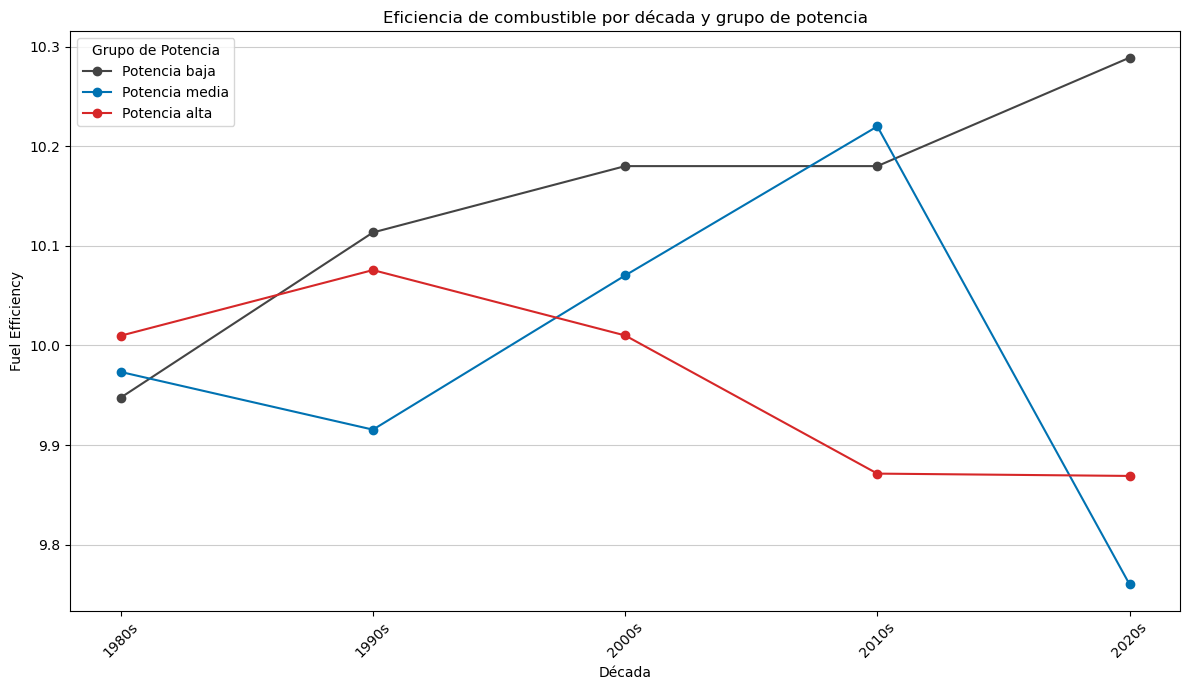

In [21]:
# Gráfico de líneas: Fuel_Efficiency por década y grupo de potencia con colores personalizados
grupos = ['Potencia baja', 'Potencia media', 'Potencia alta']
colores_grupo = {
    'Potencia baja': '#444444',   # gris oscuro
    'Potencia media': '#0072B2',  # azul
    'Potencia alta': '#D62728'    # rojo
}

plt.figure(figsize=(12,7))
for grupo in grupos:
    datos_grupo = df[df['Grupo_Potencia'] == grupo]
    promedio = datos_grupo.groupby('decada')['Fuel_Efficiency'].mean().sort_index()
    plt.plot(promedio.index, promedio.values, marker='o', label=grupo, color=colores_grupo[grupo])

plt.xlabel('Década')
plt.ylabel('Fuel Efficiency')
plt.title('Eficiencia de combustible por década y grupo de potencia')
plt.legend(title='Grupo de Potencia')
plt.xticks(rotation=45)
plt.grid(axis='y', color='black', alpha=0.2)
plt.tight_layout()
plt.show()

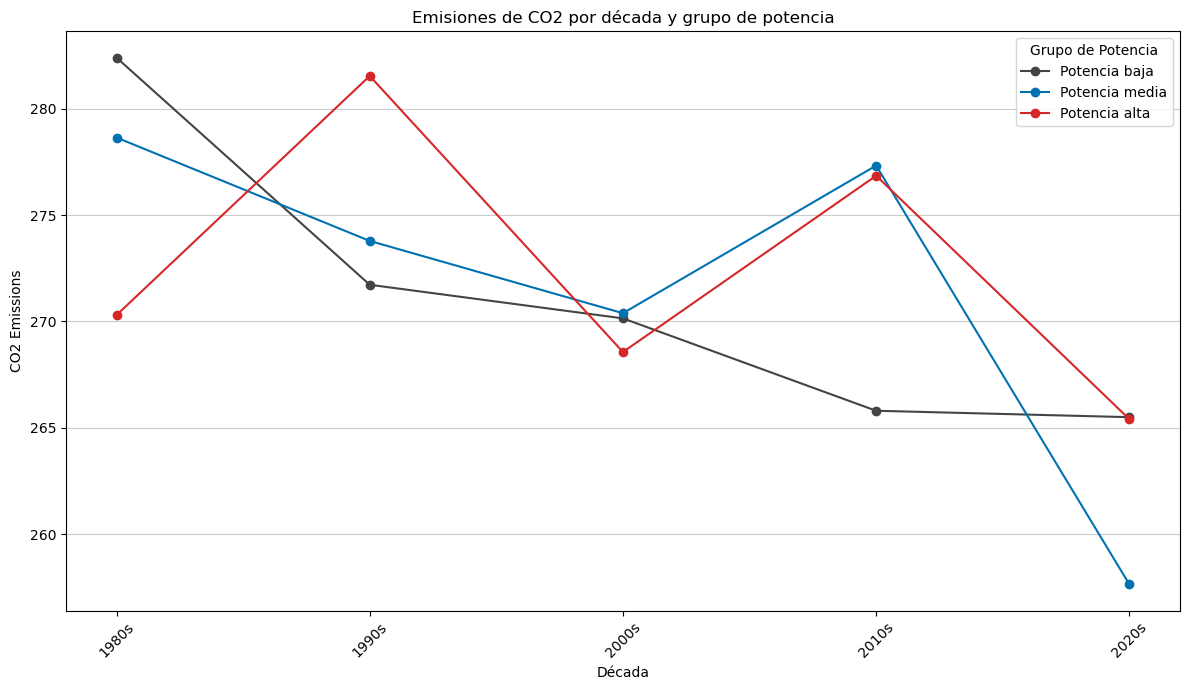

In [22]:
# Gráfico de líneas: CO2_Emissions por década y grupo de potencia con colores personalizados
grupos = ['Potencia baja', 'Potencia media', 'Potencia alta']
colores_grupo = {
    'Potencia baja': '#444444',   # gris oscuro
    'Potencia media': '#0072B2',  # azul
    'Potencia alta': '#D62728'    # rojo
}

plt.figure(figsize=(12,7))
for grupo in grupos:
    datos_grupo = df[df['Grupo_Potencia'] == grupo]
    promedio = datos_grupo.groupby('decada')['CO2_Emissions'].mean().sort_index()
    plt.plot(promedio.index, promedio.values, marker='o', label=grupo, color=colores_grupo[grupo])

plt.xlabel('Década')
plt.ylabel('CO2 Emissions')
plt.title('Emisiones de CO2 por década y grupo de potencia')
plt.legend(title='Grupo de Potencia')
plt.xticks(rotation=45)
plt.grid(axis='y', color='black', alpha=0.2)
plt.tight_layout()
plt.show()